download dataset from :-https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_csv("creditcard.csv")

**Class1 for fraudulent transactions, 0 otherwise**

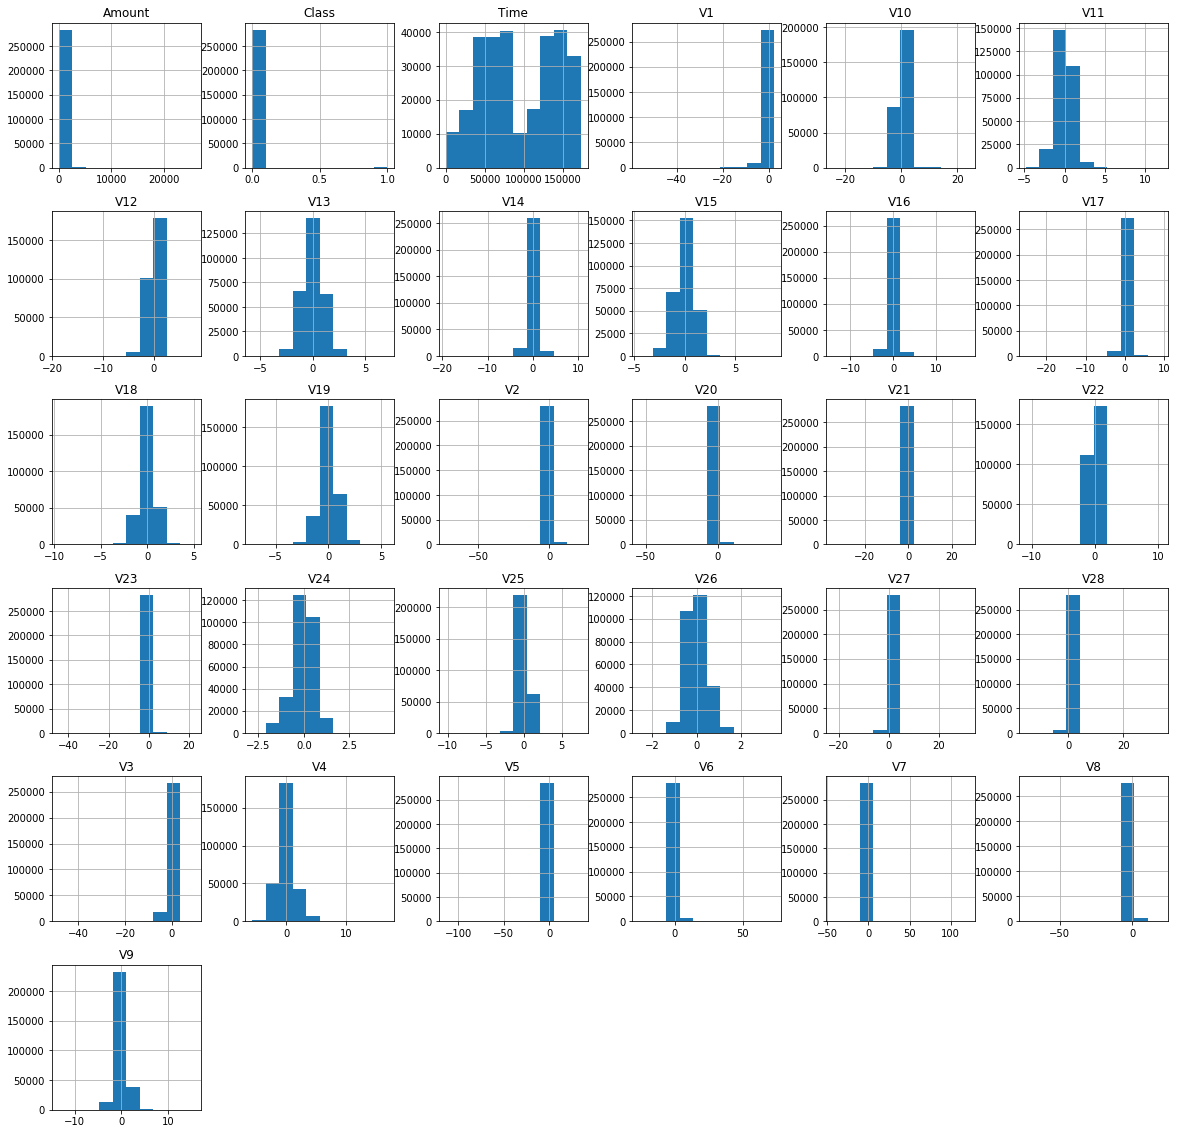

In [3]:
data.hist(figsize=(20,20))
plt.show()

In [4]:
# no. of fraud cases and  no. valid(genuine)  cases
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
print("Fraud cases:",len(fraud)," ","valid cases:",len(valid))

Fraud cases: 492   valid cases: 284315


In [5]:
data.isnull().sum()    #Checking if dataset contains  missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

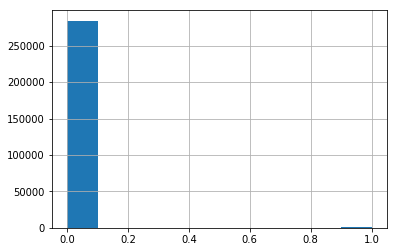

In [6]:
data['Class'].hist()
plt.show()

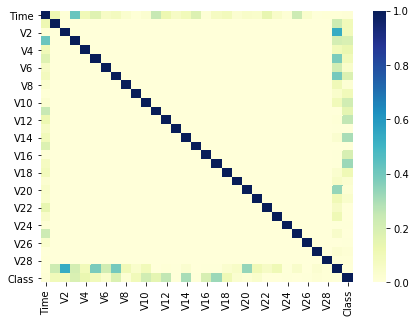

In [8]:
corr_mat=data.corr().abs()
plt.figure(figsize=(7,5))
sns.heatmap(corr_mat, cmap="YlGnBu")
plt.savefig("heatmap of data.png")
plt.show()

In [9]:
headers=list(data.columns)
print(headers,end=" ")

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'] 

In [10]:
X=np.array(data[headers[:-1]].values.tolist())
y=np.array(data[headers[-1]].values.tolist())

In [11]:
def train_test_split(X,y,size_train):
    x_len=len(X)
    y_len=len(y)
    if x_len==y_len:
        size=int(x_len*size_train)
        X_train=X[:size]
        y_train=y[:size]
        X_test=X[size:]
        y_test=y[size:]
    return X_train,y_train,X_test,y_test   

In [12]:
X_train,y_train,X_test,y_test=train_test_split(X,y,0.8)
print("Train set size:",len(X_train))
print("Train set shape:",X_train.shape)
print("Test set size:",len(X_test))
print("Test set shape:",X_test.shape)

Train set size: 227845
Train set shape: (227845, 30)
Test set size: 56962
Test set shape: (56962, 30)


# Logistic Regression Classifier

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import itertools
from sklearn.metrics import confusion_matrix

LogReg Accuracy: 0.9991046662687406
LogReg roc-auc: 0.9571053726393259

 <------------Confusion Matrix-------------------->
[[56887     0]
 [   51    24]]

 <------------Classification Report--------------->
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56887
          1       1.00      0.32      0.48        75

avg / total       1.00      1.00      1.00     56962



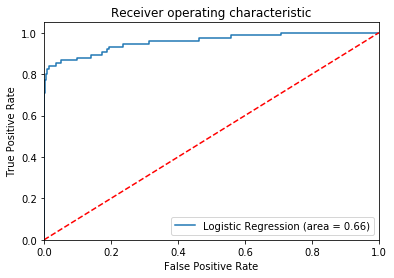

In [14]:
logit = LogisticRegression(random_state=44)

# train model
logit.fit(X_train, y_train)

#predictions
y_pred = logit.predict(X_test)

# make predicion(probabaility) on test set
pred = logit.predict_proba(X_test)

print('LogReg Accuracy: {}'.format(logit.score(X_test, y_test)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print("\n","<------------Confusion Matrix-------------------->")
print(conf_mat)

#Classification report
print("\n","<------------Classification Report--------------->")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
plt.figure()
logit_roc_auc = roc_auc_score(y_test, logit.predict(X_test))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig("Receiver operating characteristic.png")
plt.show()

Confusion matrix, without normalization
[[56887     0]
 [   51    24]]


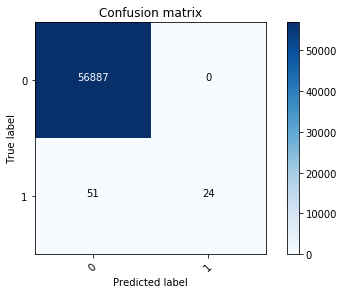

In [15]:
#ref:-
# Source: http://scikit-learn.org/stable/auto_examples/model_selection/
#plot_confusion_matrix.html#confusion-matrix

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, classes=[0, 1],title='Confusion matrix')
plt.savefig("Confusion_Matrix.png")